In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

### Some basic matplotlib plots

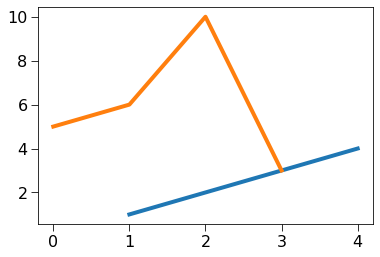

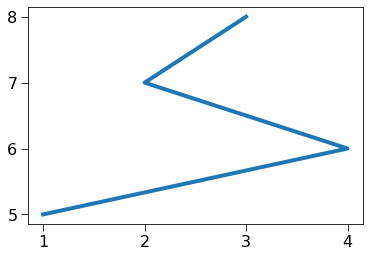

In [18]:
#Page 143
plt.figure(1); #create figure 1
plt.plot([1,2,3,4], [1,2,3,4]); #draw on figure 1
plt.figure(2); #create figure 2
plt.plot([1,4,2,3], [5,6,7,8]); #draw on figure 2
#plt.savefig('Figure-Addie') #save figure 2
plt.figure(1); #go back to working on figure 1
plt.plot([5,6,10,3]); #draw again on figure 1
#plt.savefig('Figure-Jane') #save figure 1

### Creating plots specifically for mortgages
Labeling the plot and the x,y axes

Text(0, 0.5, 'Value of Principal ($)')

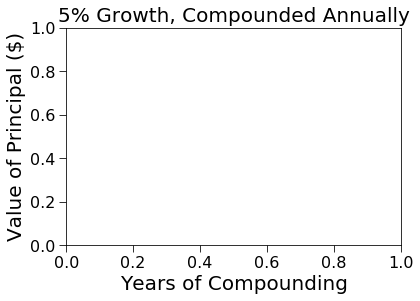

In [19]:
#Page 144
plt.title('5% Growth, Compounded Annually')
plt.xlabel('Years of Compounding')
plt.ylabel('Value of Principal ($)')

### Plot the compounded growth of the loan

Text(0, 0.5, 'Value of Principal ($)')

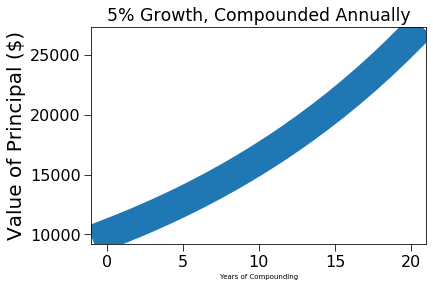

In [20]:
#Page 145
principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate
plt.plot(values, linewidth = 30)
plt.title('5% Growth, Compounded Annually',
            fontsize = 'xx-large')
plt.xlabel('Years of Compounding', fontsize = 'x-small')
plt.ylabel('Value of Principal ($)')

### Change the parameters for plotting
This is done by setting the values of class dictionary called rcParams.
As this is a class variable, it is the same for all plt objects.

In [ ]:
#Page 146
#set line width
plt.rcParams['lines.linewidth'] = 4
#set font size for titles 
plt.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
plt.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
plt.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
plt.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
plt.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
plt.rcParams['ytick.major.size'] = 7
#set size of markers
plt.rcParams['lines.markersize'] = 10

### Add plotting methods to the mortgage base class

In [ ]:
#Following function is defined in Chapter 8, and used here
def findPayment(loan, r, m):
    """Assumes: loan and r are floats, m an int
       Returns the monthly payment for a mortgage of size
       loan at a monthly rate of r for m months"""
    return loan*((r*(1+r)**m)/((1+r)**m - 1))

#Page 147, Figure 11.1
class Mortgage(object):
    """Abstract class for building different kinds of mortgages"""
    
    def __init__(self, loan, annRate, months):
        """Create a new mortgage"""
        self.loan = loan
        self.rate = annRate/12.0
        self.months = months
        self.paid = [0.0] 
        self.owed = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None #description of mortgage
        
    def makePayment(self):
        """Make a payment"""
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1]*self.rate
        self.owed.append(self.owed[-1] - reduction)
        
    def getTotalPaid(self):
        """Return the total amount paid so far"""
        return sum(self.paid)
    
    def __str__(self):
        return self.legend

    def plotPayments(self, style):
        plt.plot(self.paid[1:], style, label = self.legend)
    
    def plotBalance(self, style):
        plt.plot(self.owed, style, label = self.legend)
        
    def plotTotPd(self, style):
        """Plot the cumulative total of the payments made"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        plt.plot(totPd, style, label = self.legend)
    
    def plotNet(self, style):
        """Plot an approximation to the total cost of the mortgage
           over time by plotting the cash expended minus the equity
           acquired by paying off part of the loan"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        #Equity acquired through payments is amount of original loan
        #  paid to date, which is amount of loan minus what is still owed
        equityAcquired = np.array([self.loan]*len(self.owed))
        equityAcquired = equityAcquired - np.array(self.owed)
        net = np.array(totPd) - equityAcquired
        plt.plot(net, style, label = self.legend)

#Page 149, Figure 11.2
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed, ' + str(r*100) + '%' 

class FixedWithPts(Mortgage):
    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100.0)]
        self.legend = 'Fixed, ' + str(r*100) + '%, '\
                   + str(pts) + ' points'

class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.0
        self.legend = str(teaserRate*100)\
                      + '% for ' + str(self.teaserMonths)\
                      + ' months, then ' + str(r*100) + '%'

    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate,
                                       self.months - self.teaserMonths)
        Mortgage.makePayment(self)

### Define functions to create the plots

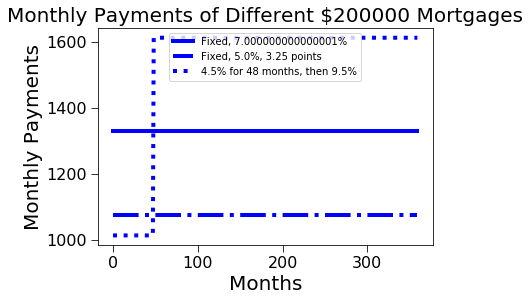

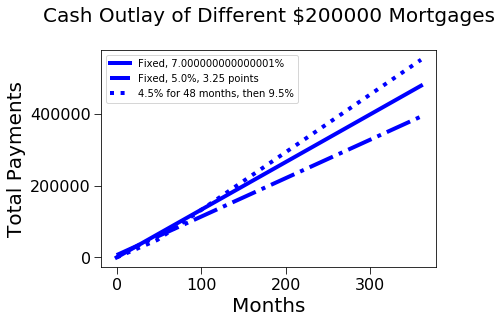

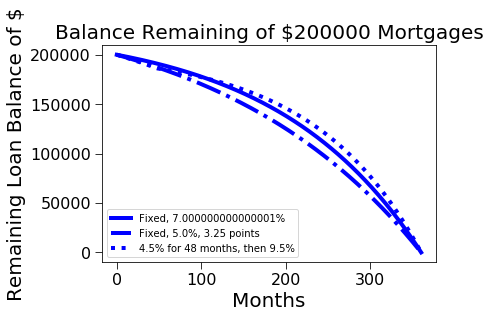

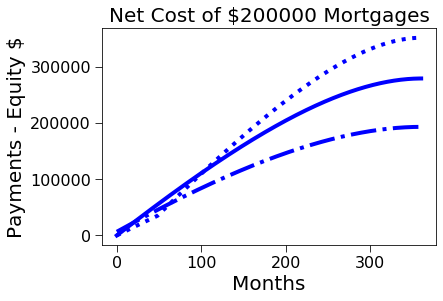

In [25]:
#Page 150, Figure 11.3
def plotMortgages(morts, amt):
    styles = ['b-', 'b-.', 'b:']
    #Give names to figure numbers
    payments = 0
    cost = 1
    balance = 2
    netCost = 3
    plt.figure(payments)
    plt.title('Monthly Payments of Different $' + str(amt)
                + ' Mortgages')
    plt.xlabel('Months')
    plt.ylabel('Monthly Payments')
    plt.figure(cost)
    plt.title('Cash Outlay of Different $' + str(amt) + ' Mortgages',y=1.1)
    plt.xlabel('Months')
    plt.ylabel('Total Payments')
    plt.figure(balance)
    plt.title('Balance Remaining of $' + str(amt) + ' Mortgages')
    plt.xlabel('Months')
    plt.ylabel('Remaining Loan Balance of $')
    plt.figure(netCost)
    plt.title('Net Cost of $' + str(amt) + ' Mortgages')
    plt.xlabel('Months')
    plt.ylabel('Payments - Equity $')
    for i in range(len(morts)):
        plt.figure(payments)
        morts[i].plotPayments(styles[i])
        plt.figure(cost)
        morts[i].plotTotPd(styles[i])
        plt.figure(balance)
        morts[i].plotBalance(styles[i])
        plt.figure(netCost)
        morts[i].plotNet(styles[i])
    plt.figure(payments)
    plt.legend(loc = 'upper center')
    plt.figure(cost)
    plt.legend(loc = 'best')
    plt.figure(balance)
    plt.legend(loc = 'best') 

def compareMortgages(amt, years, fixedRate, pts, ptsRate,
                    varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    plotMortgages(morts, amt)

#Page 150
compareMortgages(amt=200000, years=30, fixedRate=0.07,
                 pts = 3.25, ptsRate=0.05,
                 varRate1=0.045, varRate2=0.095, varMonths=48)

### Excercise
* The title and the vertical tick numbers are overlapping. Find a way to fix this.